# Машинное обучение, DS-поток
## Задание ML.5


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 10 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 90 баллов.

In [15]:
# Bot check

# HW_ID: ds_ml5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 3</font></b>
  * <b><font color="#00b565" size="3">Дал правильный ответ в пункте 1</font></b>
  * <b><font color="#00b565" size="3">Исправил выводы для пункта 2</font></b>
  * <b><font color="#00b565" size="3">В пункте 3 показал ограничения весов объектов</font></b>

* <b><font size="4">Задача 5</font></b>
  * <b><font color="#00b565" size="3">Увеличил сетку параметров для RandomizedSearchCV</font></b>
  * <b><font color="#00b565" size="3">Исправил объяснения результатов трех запусков</font></b>
  * <b><font color="#00b565" size="3">Добавил стандартизацию</font></b>


In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

---
## Теория

Рассмотрим задачу бинарной классификации, причем $\mathscr{Y} = \{+1, -1\}$. Пусть так же $\widehat{y}$ &mdash; некоторый классификатор, предсказывающий <u><i>степень принадлежности</i></u> классу. При этом решающее правило имеет вид 
 $f(x) = \text{sign}\left(\widehat{y}(x)\right)$.
В задачах 1-4 рассматриваем логистическую функцию потерь:
$$\mathcal{L}(y, z) = \log \big(1 + \exp(-yz) \big).$$

### Задача 1

Покажите, что задача минимизации по функциям $y(x)$ функционала ошибки $$Q(y) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, y(x_i)\right) \longrightarrow \min_{y(x)}$$ для логистической функции потерь эквивалентна максимизации по $y(x)$ функции правдоподобия в предположении $Y_i \sim Bern(\sigma(y(x_i)))$, где $Y_i \in \{-1, +1 \}$.

$L_Y = \prod\limits^n_{i=1} = \sigma(y(x_i))^{\frac{1 + Y_i}{2}} \cdot (1 - \sigma(y(x_i)))^{\frac{1 - Y_i}{2}}$


Откуда

$l_T = \sum\limits^n_{i=1} -{\frac{1 + Y_i}{2}} \ln(1 + e^{-y(x_i)}) - {\frac{1 - Y_i}{2}} \ln(1 + e^{y(x_i)}) \\ = 
\sum\limits^n_{i=1} -{\frac{1 + Y_i}{2}} \ln(1 + e^{-y(x_i) \cdot Y_i}) - {\frac{1 - Y_i}{2}} \ln(1 + e^{-y(x_i) \cdot Y_i}) \\ = \sum\limits^n_{i=1} -\ln(1 + e^{-y(x_i) \cdot Y_i}) \rightarrow \max$

То есть нам надо максимизировать $\sum\limits^n_{i=1} -\ln(1 + e^{-y(x_i) \cdot Y_i}) \longrightarrow \max \Leftrightarrow \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, y(x_i)\right) \longrightarrow \min_{y(x)}$

ЧТД

### Задача 2

Рассмотрим градиентный бустинг с логистической функцией потерь. Выпишите для градиентного спуска формулу для вектора сдвигов предсказаний и задачу поиска новой базовой модели по их приближению. 

1. Новую базовую модель будем искать жадно:
$$
a_k(x) = a_{k-1}(x) + b_k(x)
$$ 

Здесь a_k -- новая модель, b_k(x) -- вектор сдвига.

$b_k$​ обучается так, чтобы улучшить предсказания текущей композиции:

$$
b_k = \arg \min_{b \in B} \sum_{i=1}^{N} L(y_i, a_{k-1}(x_i) + b(x_i))
$$

Разложим функцию потерь в точке $(y_i, a_{k-1}(x_i))$ в ряд Тейлора до первого члена:
$$
\mathcal{L}(y_i, a_{k-1}(x_i) + b(x_i)) \approx \mathcal{L}(y_i, a_{k-1}(x_i)) + b(x_i) \frac{\partial \mathcal{L}(y_i, z)}{\partial z} \bigg|_{z = a_{k-1}(x_i)} 

$$


Избавляясь от констант получаем задачу оптимизации для поиска $b_k$, то есть вектора сдвига:
$$
\boxed{
b_k \approx \arg \min_{b \in \mathcal{B}} \sum_{i=1}^{N} b(x_i) \frac{\partial \mathcal{L}(y_i, z)}{\partial z} \bigg|_{z = a_{k-1}(x_i)} = \arg \min_{b \in \mathcal{B}} \sum_{i=1}^{N} b(x_i) \cdot \frac{-y_i e^{-y_i a_{k-1}(x_i)}}{1 + e^{-y_i a_{k-1}(x_i)}}
}
$$

Откуда получаем, что формула поиска новой базовой модели приобретает вид:

$$
\boxed{
a_k(x) = a_{k-1}(x) + \arg \min_{b \in \mathcal{B}} \sum_{i=1}^{N} b(x_i) \cdot \frac{-y_i e^{-y_i a_{k-1}(x_i)}}{1 + e^{-y_i a_{k-1}(x_i)}}
}
$$

### Задача 3

Предположим, модель градиентного бустинга $\widehat{y}_{t - 1}$ уже построена.
1. Выпишите вид функционала ошибки $Q(\widehat{y}_t) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}_t(x_i)\right)$ для логистической функции потерь. Одинаковый ли вклад вносят разные объекты в ошибку при построении новой базовой модели $b_t$?
2. Посмотрите на формулу для вектора сдвигов, полученную в предыдущей задаче. Как она выражается через отклики на объектах обучающей выборки? Одинаковый ли вклад вносят разные объекты в формирование вектора сдвигов при построении новой базовой модели $b_t$?
3.  На лекции было показано, что для экспоненциальной функции есть проблема: базовый классификатор может настраиваться только на шумовые объекты. Наблюдается ли такая проблема у логистической функции потерь? Как она ведет себя на объектах с сильно отрицательным, околонулевым, сильно положительным отсупами?

<b><font color="#00b565" size="5">Дал правильный ответ в пункте 1</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Неправильный ответ в пункте 1. Инд. комм. Вопрос был про вклад объектов



1.
$Q(\widehat{y}_t) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}_t(x_i)\right) = \sum\limits_{i=1}^n \ln(1 + \exp(-Y_i \cdot y_t(x_i))$

Отсюда видно, что максимальный вклад вносят объекты с наименьшим значением $Y_i\cdot y_t(x_i)$ дают наибольший вклад в ошибку. Отсюда следует, что объекты вносят разный вклад в ошибку.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


2. 

<b><font color="#00b565" size="5">Исправил выводы для пункта 2</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> В пункте 2 неверная формула / вывод. Инд. комм. Если не зашумлены, вклад будет одинаковым?


Перепишем формулу сдвига через отклики
$$
\boxed{
b_k \approx = \arg \min_{b \in \mathcal{B}} \sum_{i=1}^{N} b(x_i) \cdot \frac{-Y_i e^{-Y_i \hat{y}_{k-1}(x_i)}}{1 + e^{-Y_i \hat{y}_{k-1}(x_i)}}
}
$$

Отсюда видно, что если $y_{k-1}$ зашумлены, то вклад вновь будет не одинаковым.

Впрочем, если $y_{k-1}$ не зашумлены, то мы все равно имеем зависимость от $Y_i \cdot \hat{y}_{k-1}(x_i)$, а значит и вклад будет разный.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


<b><font color="#00b565" size="5">В пункте 3 показал ограничения весов объектов</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> В пункте 3 не показано, что вес объекта ограничен в случае логистической функции в отличие от экспоненциальной.


3.

Распишем функционал

$Q(\widehat{y}_t) = \sum\limits_{i = 1}^n L\left(Y_i, \widehat{y}_t(x_i)\right) 
= \sum\limits_{i = 1}^n \ln \left(1 + \exp(-Y_i \cdot \hat{y}_t(x_i)) \right)  \\ 
= \sum\limits_{i = 1}^n \ln \left(1 + \exp[-Y_i \cdot (\hat{y}_{t-1}(x_i) + \gamma_tb_t(x_i))]\right) 
=  \sum\limits_{i = 1}^n \ln \left(1 + \exp[-Y_i \cdot \hat{y}_{t-1}(x_i)] \cdot \exp[\gamma_tb_t(x_i)]\right)$

3.1 $Y_i \cdot y_t(x_i) \ll 0$

$\ln(1 + \exp(-Y_i \cdot y_t(x_i))) \approx Y_i \cdot y_t(x_i)$ -- Ошибка изменяется линейно

3.2 $Y_i \cdot y_t(x_i) \approx 0$

$\ln(1 + \exp(-Y_i \cdot y_t(x_i))) \approx \ln{2}$ -- Ошибка равна коснтанте

3.3 $Y_i \cdot y_t(x_i) \gg 0$

$\ln(1 + \exp(-Y_i \cdot y_t(x_i))) \approx \ln{1} = 0$ -- Ошибка равна нулю


Таким образом, логистическая функция ошибки слабо реагирует на выбросы, а значит и полученная модель будет более устойчива.

Из выписанных формул видно, что вес объекта ограничен в случае логистической функции в отличие от экспоненциальной.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


### Задача 4

Рассмотрим градиентный бустинг над решающими деревьями с логистической функции потерь. После построения дерева будем делать перенастройку в листьях дерева.
1. Выпишите оптимизационную задачу для коэффициентов $\gamma_{tj}$ &mdash; новых ответов в листьях.
2. Решите полученную задачу сделав один шаг метода Ньютона из начального приближения $\gamma_{tj} = 0$, что соответствует отсутствию базовой модели $b_t$.


1. $\gamma_{tk} = \arg \min_{\gamma} \sum\limits_{x_i \in R_k} \mathcal{L}(y_i; \hat{y}_{t-1}(x_i) + \gamma), \quad k = 1, \dots, \ell_t$

Где $R_k$ -- соответствующая область разбиения, $\overline{1, ..., l_t}$ -- индексы листьев.

2.

Обозначим $F_t^k(\gamma) = \sum\limits_{x_i \in R_k} \mathcal{L}(y_i; \hat{y}_{t-1}(x_i) + \gamma) \rightarrow \min$

По аналогии из лекции имеем:

\begin{align*}
\gamma_{tk} &= -\frac{\partial F_t^k(Y_t, y_{t-1}(x_t))}{\partial y_{t-1}(x_t)} / \frac{\partial^2 F_t^k(Y_t, y_{t-1}(x_t))}{\partial y_{t-1}(x_t)^2} \\
&= \sum\limits_{x_t \in R_k}\frac{Y_t e^{-Y_t y_{t-1}(x_t)}}{1 + e^{-Y_t y_{t-1}(x_t)}} / \sum\limits_{x_t \in R_k}\frac{Y_t^2 e^{Y_t y_{t-1}(x_t)}}{(1 + e^{-Y_t y_{t-1}(x_t)})^2}
\end{align*}


---
## Практика

### Задача 5

**Внимание!** 

Перед выполнением задачи прочитайте полностью условие. В задаче используются смеси различных моделей с разными гиперпараметрами. Подумайте над тем, какой гиперпараметр как подбирать и на каком множестве. Не забудьте, что на тестовой выборке, по которой делаются итоговые выводы, ничего не должно обучаться.

**Не забывайте делать выводы в каждом пункте!**

#### 1.

Повторите исследование, проведенное в задаче 2 задания ML.4, используя градиентный бустинг из `sklearn`. Сравните полученные результаты со случайным лесом. 

Вкратце опишем задания:
1. Посмотрите, как меняется качество модели в зависимости от значений гиперпараметров и сделайте выводы по результатам. Гиперпараметры:
    * количество деревьев (`n_estimators`) [от 1 до 400];
    * максимальная глубина дерева (`max_depth`) [от 1 до 15];
    * скорость обучения (`learning_rate`), поясните также смысл этого параметра.
2. Запустите модель три раза с параметрами по-умолчанию. Объясните результаты.
3. Подберите оптимальные гиперпараметры, рассмотренные в первом пункте и зафиксируйте их.
4. Исследуйте зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.

*Замечания.*
* В качестве основы можно использовать как свое решение задания ML.4, так и выложенное на [сайте](https://thetahat.ru). В большинстве случаев нужно только заменить `RandomForestRegressor` на `GradientBoostingRegressor`.
* При сравнении методов по одинаковым свойствам желательно рисовать результаты на одном графике.
* Обратите внимание на метод `staged_predict` у `GradientBoostingRegressor`. Он позволяет получить "кумулятивные" предсказания, то есть по первым $t$ деревьям по всем значениям $t$.
* При желании, границы рассмотрения значений гиперпараметров можно увеличить.
* При подборе гиперпараметров при помощи рандомизированного поиска проводите достаточное количество итераций на большой сетке параметров &mdash; как минимум 50. Даже если долго обучается.

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb

sns.set(font_scale=1.5)



In [18]:
SIZE= 1000

housing = fetch_california_housing()
X, y = housing.data, housing.target

# X = X[:SIZE]
# y = y[:SIZE]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=17
)


In [20]:
def plot_dependence_test(param_grid, test_values, param_label,
                         metrics_label, title):
    '''
    Функция для построения графиков зависимости целевой метрики 
    от некоторого параметра модели на валидационной выборке.
    
    Параметры.
    1) param_grid — значения исследуемого параметра,
    2) test_values — значения метрики на валидационной выборке,
    3) param_label — названия параметра,
    4) metrics_label — название метрики,
    5) title — заголовок для графика.
    '''
    
    plt.figure(figsize=(12, 6))
    plt.plot(param_grid, test_values, label='test', linewidth=3)
   
    plt.xlabel(param_label)
    plt.ylabel(metrics_label)
    plt.legend()
    plt.title(title)
    plt.show()

In [21]:
regressor = GradientBoostingRegressor(n_estimators=400, random_state=42, max_depth=3)
regressor.fit(X_train, y_train)

predictions_by_tree = list(regressor.staged_predict(X_test))

n_estimators_grid = np.arange(1, 401)
predictions = np.cumsum(predictions_by_tree, axis=0) \
                / n_estimators_grid[:, np.newaxis]
mse_values = [mse(y_test, p) for p in predictions]

Для начала посмотрим на зависимость от количества деревьев.

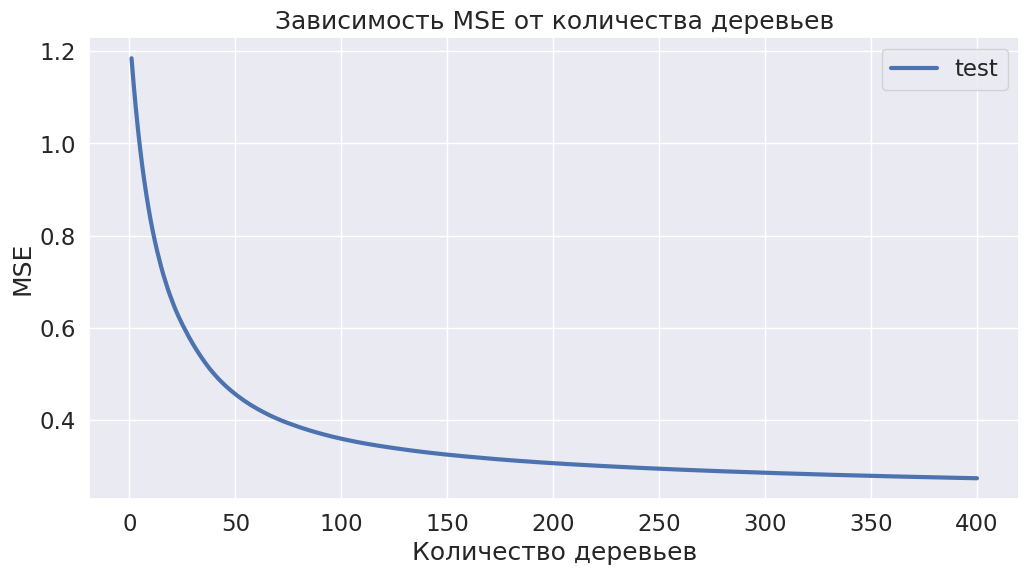

In [22]:
plot_dependence_test(n_estimators_grid, mse_values, 
                     'Количество деревьев', 'MSE', 
                     'Зависимость MSE от количества деревьев')

Как видим с увеличением количства деревьев лосс монотонно падает.

Посмотрим на зависимость максимальной глубины

In [23]:
mse_values = []

for max_depth in tqdm(range(1, 16)):
    regressor = GradientBoostingRegressor(
        max_depth=max_depth, n_estimators=50, random_state=42
    )
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse_values.append(mse(y_test, predictions))

  0%|          | 0/15 [00:00<?, ?it/s]

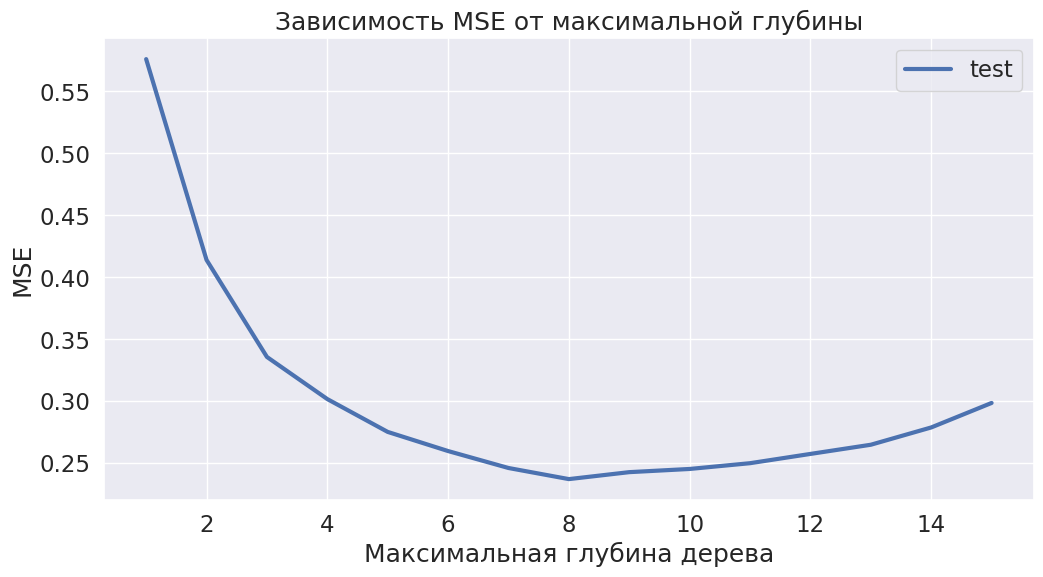

In [24]:
plot_dependence_test(
    np.arange(1, 16),
    mse_values,
    "Максимальная глубина дерева",
    "MSE",
    "Зависимость MSE от максимальной глубины",
)

Видим, что начиная с некоторого момента график лосса начинает расти.

Рассмотрим зависимость от learning_rate

In [25]:
mse_values = []

for learning_rate in tqdm(np.linspace(0.1, 1, 10)):
    regressor = GradientBoostingRegressor(
        max_depth=3, n_estimators=50, random_state=42, learning_rate=learning_rate
    )
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    mse_values.append(mse(y_test, predictions))

  0%|          | 0/10 [00:00<?, ?it/s]

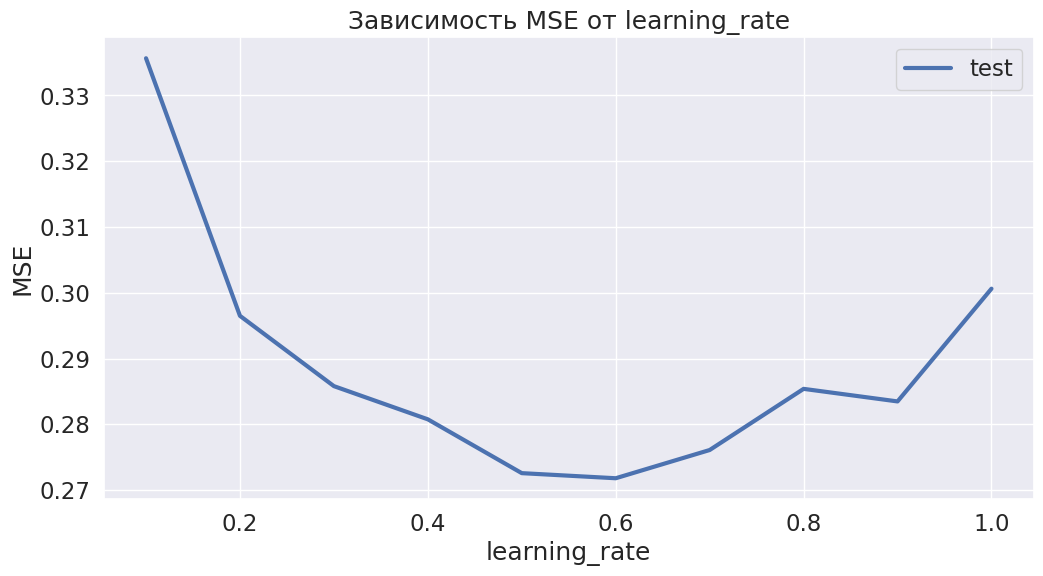

In [26]:
plot_dependence_test(
    np.linspace(0.1, 1, 10),
    mse_values,
    "learning_rate",
    "MSE",
    "Зависимость MSE от learning_rate",
)

learning rate отвечает за то, чтобы сдвиги которые мы делаем в градиентном бустинге не были слишком большими, то есть этот параметр отвечает за то, чтобы мы случайно не "перешагнули" оптимальный сдвиг.

Запустим стандартную модель трижды, и выведем полученный лосс.

In [27]:
def create_gdb_and_print_loss(X_train, y_train, X_test, y_test):
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    mse_val = mse(y_test, pred)
    print(f"MSE: {mse_val:.3f}")

for _ in range(3):
    create_gdb_and_print_loss(X_train, y_train, X_test, y_test)

MSE: 0.294
MSE: 0.294
MSE: 0.294


<b><font color="#00b565" size="5">Исправил объяснения результатов трех запусков</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> 
Нет объяснений (или они некорректные) результатов трех запусков моделей с параметрами по умолчанию

Случайность возникает из-за случайного порядка перебора признаков при разбиении вершины: если есть два признака, которые дают одинаковое оптимальное значение критерия информативности, то из них выбирается тот, что первым перебирается. 

<b><font color="#00b565" size="5">Конец исправлений</font></b>

Подберем оптимальные параметры и зафиксируем их. 

<b><font color="#00b565" size="5">Увеличил сетку параметров для RandomizedSearchCV</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> 
 Плохой подбор параметров. Инд. комм. Очень маленькая сетка для рандом серча 

In [28]:
gdb_gridsearch = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions={
        "max_depth": np.arange(2, 7).tolist(),  
        "n_estimators": [100, 200, 300],
        "learning_rate": np.logspace(-4, 0, 7),  
        "min_samples_split": [2, 5, 10],  
    },
    scoring="neg_mean_squared_error",  # оптимизируемый скор
    cv=3,  # разбиение выборки на 3 фолда
    verbose=1,  # насколько часто печатать сообщения
    n_jobs=-1,  # кол-во параллельных процессов
    n_iter=50,  # кол-во итераций случайного выбора гиперпараметров
    random_state=0,  # seed для фиксации генератора случайных чисел
)

gdb_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00]),
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=1)

<b><font color="#00b565" size="5">Конец исправлений</font></b>

Лучшие параметры

In [29]:
gdb_gridsearch.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_depth': 6,
 'learning_rate': 0.21544346900318823}

In [30]:
max_depth = gdb_gridsearch.best_params_["max_depth"]
n_estimators = gdb_gridsearch.best_params_["n_estimators"]
learning_rate = gdb_gridsearch.best_params_["learning_rate"]

Оценим качество предсказаний обученного градиентного бустинга.

In [31]:
predictions = gdb_gridsearch.best_estimator_.predict(X_test)
print("{:.4f}".format(mse(y_test, predictions)))

0.2309


Исследуем зависимость метрики от количества признаков

In [32]:
mse_train_values = []
mse_test_values = []

for n_features in tqdm(range(1, 9)):
    rf_regressor = GradientBoostingRegressor(
        max_depth=max_depth,
        n_estimators=n_estimators,
        max_features=n_features,
        random_state=42,
    )
    rf_regressor.fit(X_train, y_train)

    current_train_mse = mse(y_train, rf_regressor.predict(X_train))
    current_test_mse = mse(y_test, rf_regressor.predict(X_test))
    print(
        "n_features: {}, train_mse: {:.4f}, test_mse: {:.4f}".format(
            n_features, current_train_mse, current_test_mse
        )
    )

    mse_train_values.append(current_train_mse)
    mse_test_values.append(current_test_mse)

  0%|          | 0/8 [00:00<?, ?it/s]

n_features: 1, train_mse: 0.1265, test_mse: 0.2549
n_features: 2, train_mse: 0.0987, test_mse: 0.2345
n_features: 3, train_mse: 0.0922, test_mse: 0.2302
n_features: 4, train_mse: 0.0877, test_mse: 0.2267
n_features: 5, train_mse: 0.0870, test_mse: 0.2263
n_features: 6, train_mse: 0.0872, test_mse: 0.2265
n_features: 7, train_mse: 0.0869, test_mse: 0.2309
n_features: 8, train_mse: 0.0862, test_mse: 0.2285


In [33]:
def plot_dependence(
    param_grid,
    train_values,
    test_values,
    param_label="",
    metrics_label="",
    title="",
    train_label="train (RandomForest)",
    test_label="test (RandomForest)",
    create_figure=True,
):
    """
    Функция для построения графиков зависимости целевой метрики
    от некоторого параметра модели на обучающей и на валидационной
    выборке.

    Параметры.
    1) param_grid — значения исследуемого параметра,
    2) train_values — значения метрики на обучающей выборке,
    3) test_values — значения метрики на валидационной выборке,
    4) param_label — названия параметра,
    5) metrics_label — название метрики,
    6) title — заголовок для графика,
    7) create_figure — флаг, устанавливающий нужно ли создавать
    новую фигуру для графика.
    """

    if create_figure:
        plt.figure(figsize=(12, 6))
    plt.plot(param_grid, train_values, label=train_label, linewidth=3)
    plt.plot(param_grid, test_values, label=test_label, linewidth=3)

    plt.legend()
    if create_figure:
        plt.xlabel(param_label)
        plt.ylabel(metrics_label)
        plt.title(title, fontsize=20)

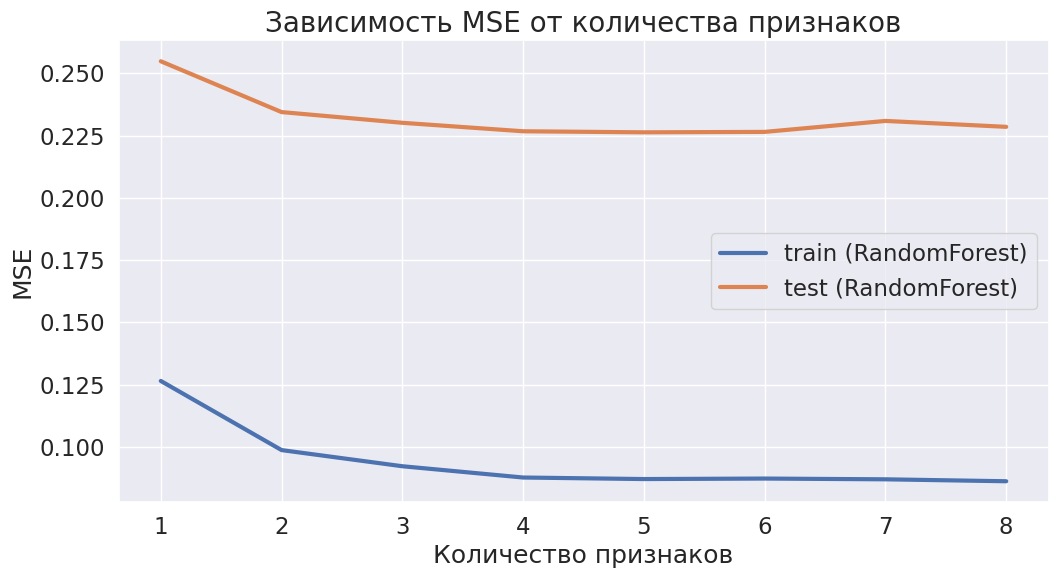

In [34]:
plot_dependence(
    range(1, 9),
    mse_train_values,
    mse_test_values,
    "Количество признаков",
    "MSE",
    "Зависимость MSE от количества признаков",
)

Как видим, лосс на train и на test почти зависит от количества признаков только при малых n_features. Это происходит из-за того что в бустинге, в отличии от случайного леса, мы строим последовательные модели, а значит все равно в среднем все равно перебираем все признаки.

**Выводы:**

**2.**

Проведите сравнение случайного леса и градиентного бустинга с оптимальными гиперпараметрами, подобранными ранее, по производительности, в рамках которого выполните следующие действия.
* Замерьте время обучения данных моделей.
* Замерьте время построения предсказания для каждого объекта тестовой выборки. Постройте гистограмму, посчитайте среднее время и предсказательный интервал (возьмите выборочные квантили).
* Сравните фактическую глубину деревьев и количество листьев в композициях с помощью гистограмм. Посчитайте также среднее значение указанных характеристик. Используйте методы `get_depth()` и `get_n_leaves()` у решающего дерева.

Лучшие параметры нам известны из прошлого д/з, их и возьмем

In [35]:
rf_model = RandomForestRegressor(n_estimators=226, max_depth=26)

gdb_model = GradientBoostingRegressor(
    n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate
)

Замерим время обучения моделей

In [36]:
import time

gdb_times = []
rf_times = []
n_runs = 15

for run in tqdm(range(n_runs)):
    start_time = time.time()
    rf_model.fit(X_train, y_train)
    rf_training_time = time.time() - start_time
    rf_times.append(rf_training_time)

    start_time = time.time()
    gdb_model.fit(X_train, y_train)
    gdb_training_time = time.time() - start_time
    gdb_times.append(gdb_training_time)

print(f"Время обучения RandomForestRegressor: {np.mean(rf_times):.4f} секунд")
print(f"Время обучения GradientBoostingRegressor: {np.mean(gdb_times):.4f} секунд")


  0%|          | 0/15 [00:00<?, ?it/s]

Время обучения RandomForestRegressor: 40.8665 секунд
Время обучения GradientBoostingRegressor: 20.0342 секунд


Замерим время построения предсказаний для каждого объекта тестовой выборки

In [37]:
predict_gdb_times = []
predict_rf_times = []

for tmp_x in X_test:
    start_time = time.time()
    rf_model.predict(tmp_x.reshape(1, -1))
    rf_predict_time = time.time() - start_time
    predict_rf_times.append(rf_predict_time)

    start_time = time.time()
    gdb_model.predict(tmp_x.reshape(1, -1))
    gdb_training_time = time.time() - start_time
    predict_gdb_times.append(gdb_training_time)

predict_gdb_times = np.array(predict_gdb_times) * 1000
predict_rf_times = np.array(predict_rf_times) * 1000

rf_quantiles = np.percentile(predict_rf_times, [2.5, 97.5]) 
gdb_quantiles = np.percentile(predict_gdb_times, [2.5, 97.5])

print(
    f"Срденее время предсказания для одного объекта выборки RandomForestRegressor: {np.mean(predict_rf_times):.4f} мс"
)
print(
    f"Срденее время предсказания для одного объекта выборки GradientBoostingRegressor: {np.mean(predict_gdb_times):.4f} мс"
)

print(
    f"Предсказательный интервал для RandomForestRegressor (95%): [{rf_quantiles[0]:.4f}, {rf_quantiles[1]:.4f}] мс"
)
print(
    f"Предсказательный интервал для GradientBoostingRegressor (95%): [{gdb_quantiles[0]:.4f}, {gdb_quantiles[1]:.4f}] мс"
)

Срденее время предсказания для одного объекта выборки RandomForestRegressor: 15.5922 мс
Срденее время предсказания для одного объекта выборки GradientBoostingRegressor: 0.7069 мс
Предсказательный интервал для RandomForestRegressor (95%): [14.6134, 16.4616] мс
Предсказательный интервал для GradientBoostingRegressor (95%): [0.5982, 0.8459] мс


Построим гистограмму, посчитаем среднее время и предсказательный интервал.

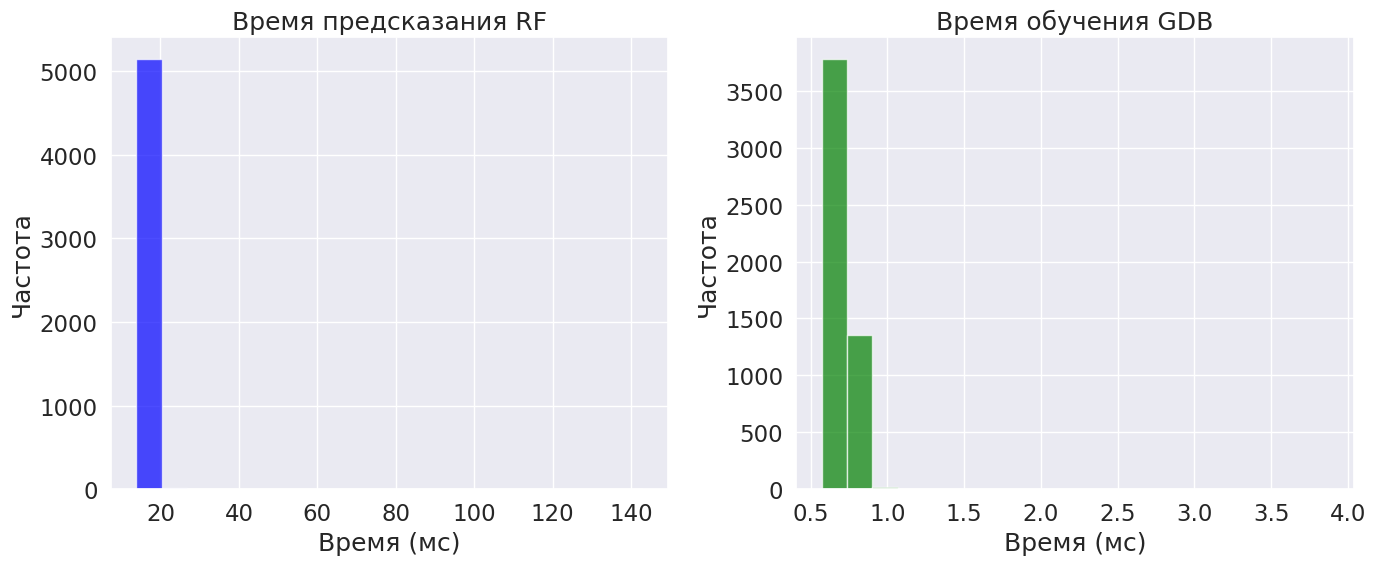

In [38]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(predict_rf_times, bins=20, color="blue", alpha=0.7)
plt.title("Время предсказания RF")
plt.xlabel("Время (мс)")
plt.ylabel("Частота")

plt.subplot(1, 2, 2)
plt.hist(predict_gdb_times, bins=20, color="green", alpha=0.7)
plt.title("Время обучения GDB")
plt.xlabel("Время (мс)")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

Сравним фактическую глубину деревьев и количество листьев в композициях

In [39]:
rf_model = RandomForestRegressor(n_estimators=226, max_depth=26)

gdb_model = GradientBoostingRegressor(
    n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate
)

rf_model.fit(X_train, y_train)
gdb_model.fit(X_train, y_train)

rf_depths = []
rf_leaves = []
gdb_depths = []
gdb_leaves = []

for tree in rf_model.estimators_:
    rf_depths.append(tree.get_depth())
    rf_leaves.append(tree.get_n_leaves())

for tree in gdb_model.estimators_:
    gdb_depths.append(tree[0].get_depth())
    gdb_leaves.append(tree[0].get_n_leaves())

rf_mean_depth = np.mean(rf_depths)
rf_mean_leaves = np.mean(rf_leaves)
gdb_mean_depth = np.mean(gdb_depths)
gdb_mean_leaves = np.mean(gdb_leaves)

print(f"RandomForestRegressor: Средняя глубина деревьев: {rf_mean_depth:.2f}, Среднее количество листьев: {rf_mean_leaves:.2f}")
print(f"GradientBoostingRegressor: Средняя глубина деревьев: {gdb_mean_depth:.2f}, Среднее количество листьев: {gdb_mean_leaves:.2f}")


RandomForestRegressor: Средняя глубина деревьев: 26.00, Среднее количество листьев: 9297.74
GradientBoostingRegressor: Средняя глубина деревьев: 6.00, Среднее количество листьев: 51.95


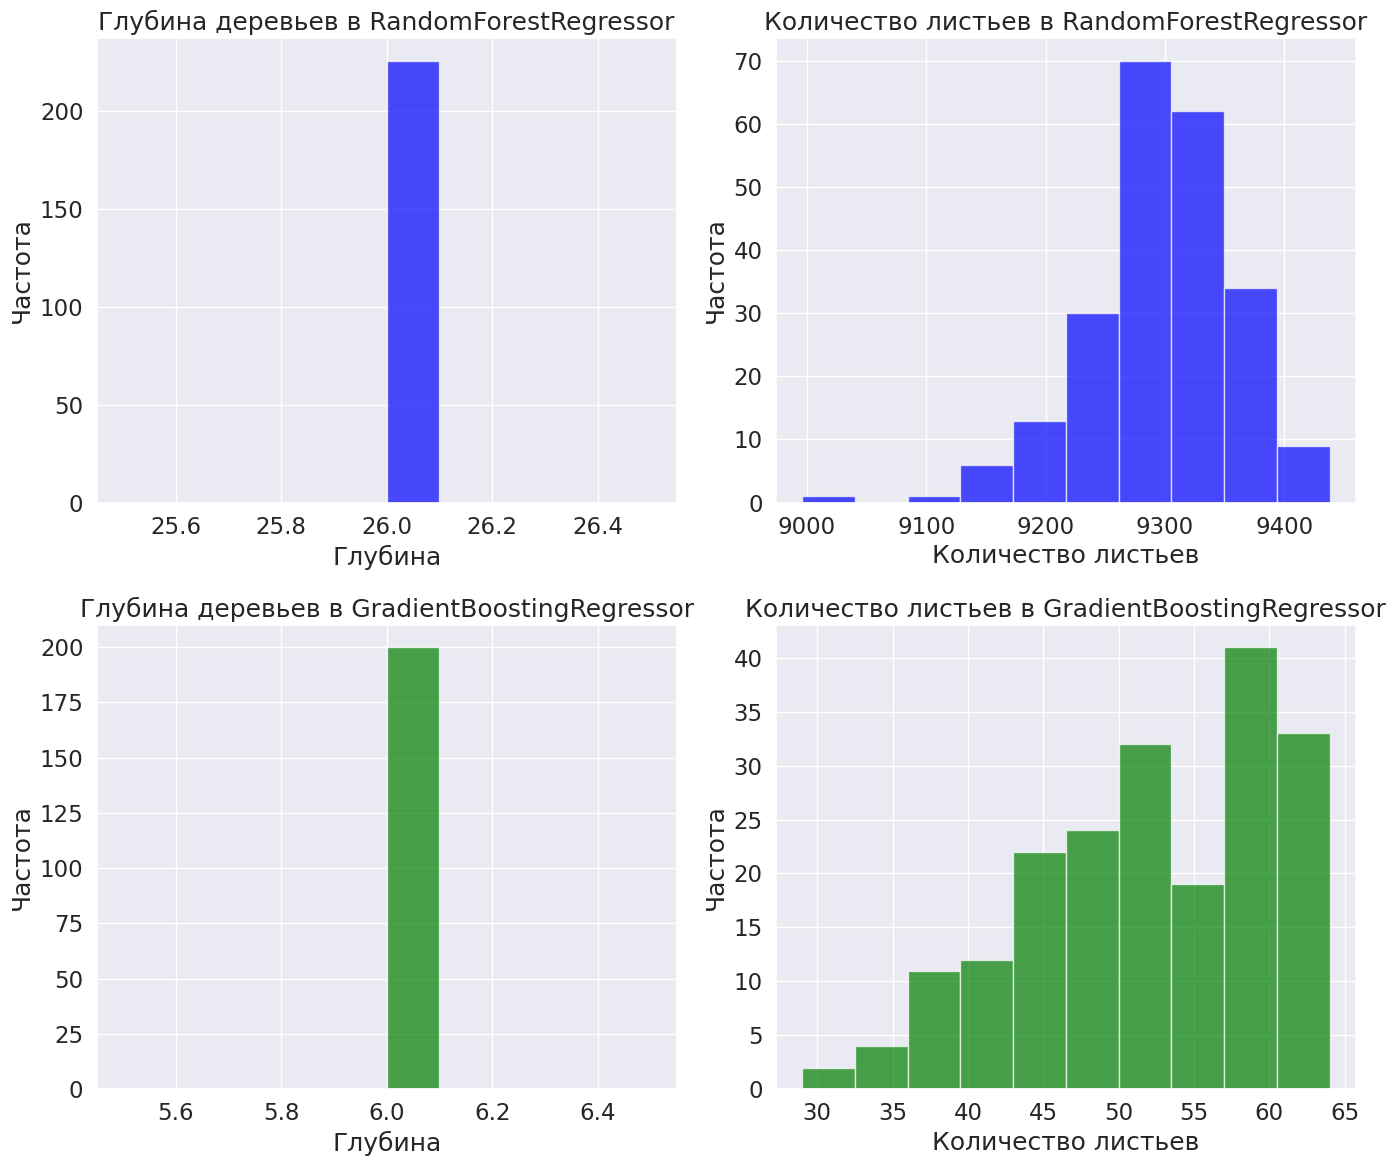

In [40]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
plt.hist(rf_depths, color='blue', alpha=0.7)
plt.title('Глубина деревьев в RandomForestRegressor')
plt.xlabel('Глубина')
plt.ylabel('Частота')

plt.subplot(2, 2, 2)
plt.hist(rf_leaves, color='blue', alpha=0.7)
plt.title('Количество листьев в RandomForestRegressor')
plt.xlabel('Количество листьев')
plt.ylabel('Частота')

plt.subplot(2, 2, 3)
plt.hist(gdb_depths,  color='green', alpha=0.7)
plt.title('Глубина деревьев в GradientBoostingRegressor')
plt.xlabel('Глубина')
plt.ylabel('Частота')

plt.subplot(2, 2, 4)
plt.hist(gdb_leaves, color='green', alpha=0.7)
plt.title('Количество листьев в GradientBoostingRegressor')
plt.xlabel('Количество листьев')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


**Выводы:**

Мы видим, что градиентный бустинг в среднем обучается быстрее чем случайный лес. Это связано с тем. что деревья в нем на порядок менее глубокие, и содержат они меньше листьев. Таким образом, можно считать предпочтительной стратегией предсказания данных, чем случайный лес.

Действительно, сравнивая MSE градиентного бустинга и случайного леса получаем, что они примерно одинаково решает задачу минимизации.

#### 3. 

Выберите самый значимый признак согласно `feature_importances_`. Визуализируйте работу бустинга, обученного только на одном этом признаке.

Для этого рассмотрите процесс построения бустинга для первых 10 итераций. При визуализации требуется для каждой итерации нарисовать:
* предсказания новой базовой модели и выборку, на которой эта базовая модель обучается;
* предсказания текущей композиции и исходную обучающую выборку. 

Пример графиков смотрите в лекции в разделе бустинг в задаче регресии.

In [41]:
gdb_model = GradientBoostingRegressor(
    n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate
)

gdb_model.fit(X_train, y_train)

importances = gdb_model.feature_importances_
most_important_feature_idx = np.argmax(importances)
print(f"Самый значимый признак: {most_important_feature_idx}")

X_one_feature_train = X_train[:, most_important_feature_idx].reshape(-1, 1)
X_one_feature_test = X_test[:, most_important_feature_idx].reshape(-1, 1)


gdb_one_feature_model = GradientBoostingRegressor(
    n_estimators=10, max_depth=5, learning_rate=0.6, random_state=42
)
gdb_one_feature_model.fit(X_one_feature_train, y_train)

Самый значимый признак: 0


GradientBoostingRegressor(learning_rate=0.6, max_depth=5, n_estimators=10,
                          random_state=42)

In [42]:
def plot_iteration_subplot(i, n_iterations, X_test, y_test, curr_pred, old_pred, feature_idx):
    plt.figure(figsize=(14, 6 * n_iterations))

    plt.subplot(n_iterations, 2, i * 2 + 1)
    plt.scatter(X_test, y_test, color="blue", alpha=0.1, label="Исходные данные")
    plt.plot(
        X_test,
        curr_pred,
        ls=" ",
        marker="o",
        color="green",
        alpha=0.3,
        label="Предсказания нового дерева",
    )
    plt.title(fr"$y({i})$")
    plt.xlabel(f"Значение признака {feature_idx}")
    plt.ylabel("Предсказания")
    plt.legend()

    plt.subplot(n_iterations, 2, i * 2 + 2)
    plt.scatter(X_test, y_test - old_pred, color="blue", alpha=0.1, label="Новые данные")
    plt.plot(
        X_test,
        curr_pred - old_pred,
        ls=" ",
        marker="o",
        color="magenta",
        alpha=0.3,
        label="Разница предсказаний",
    )
    plt.title(fr"$b({i})$")
    plt.xlabel(f"Значение признака {feature_idx}")
    plt.ylabel("Разница предсказаний")
    plt.legend()

    plt.tight_layout()
    plt.show()

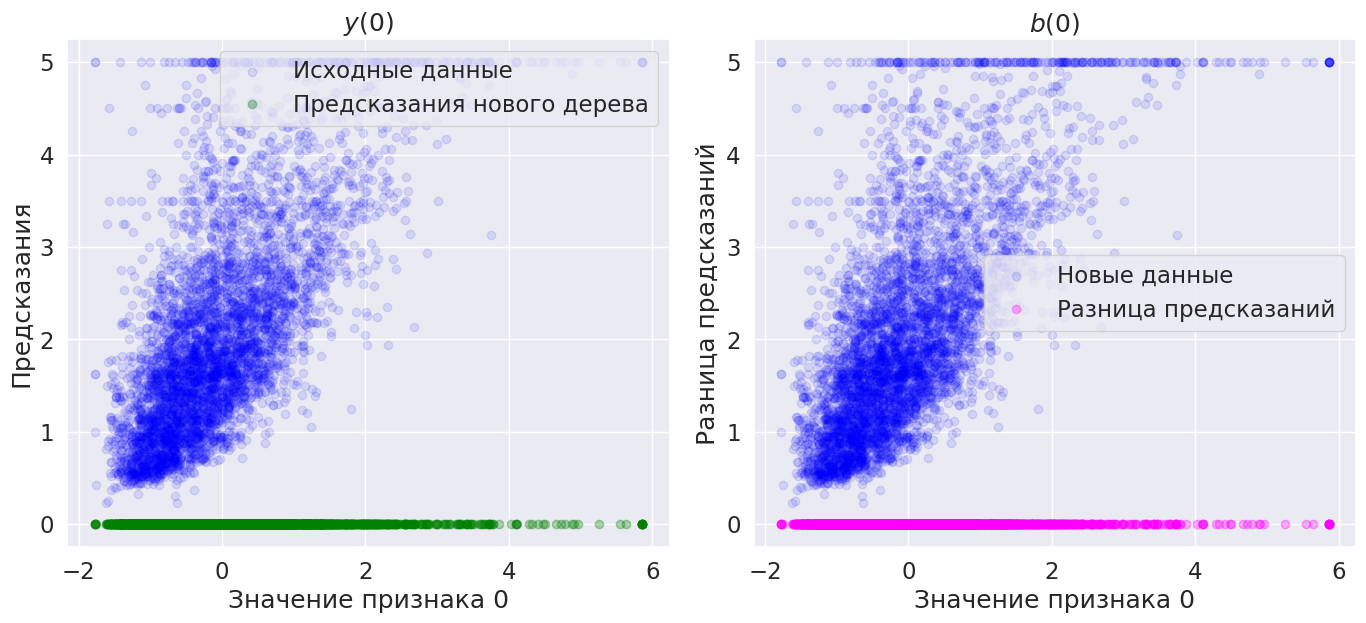

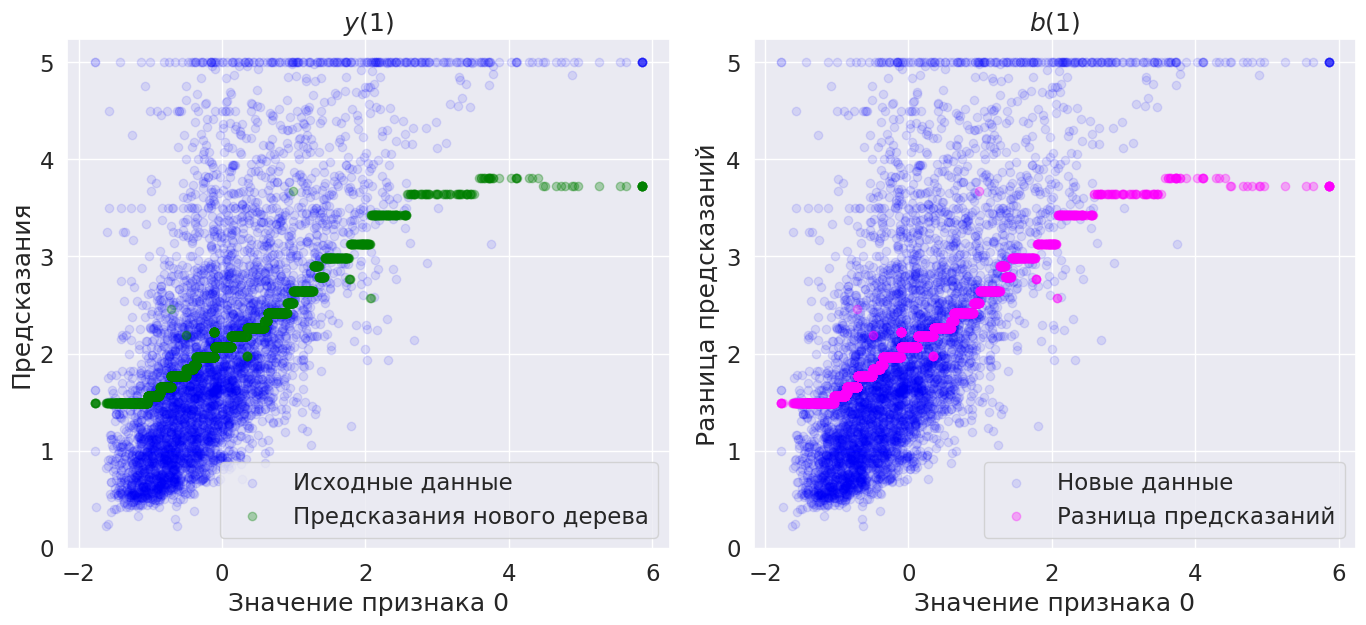

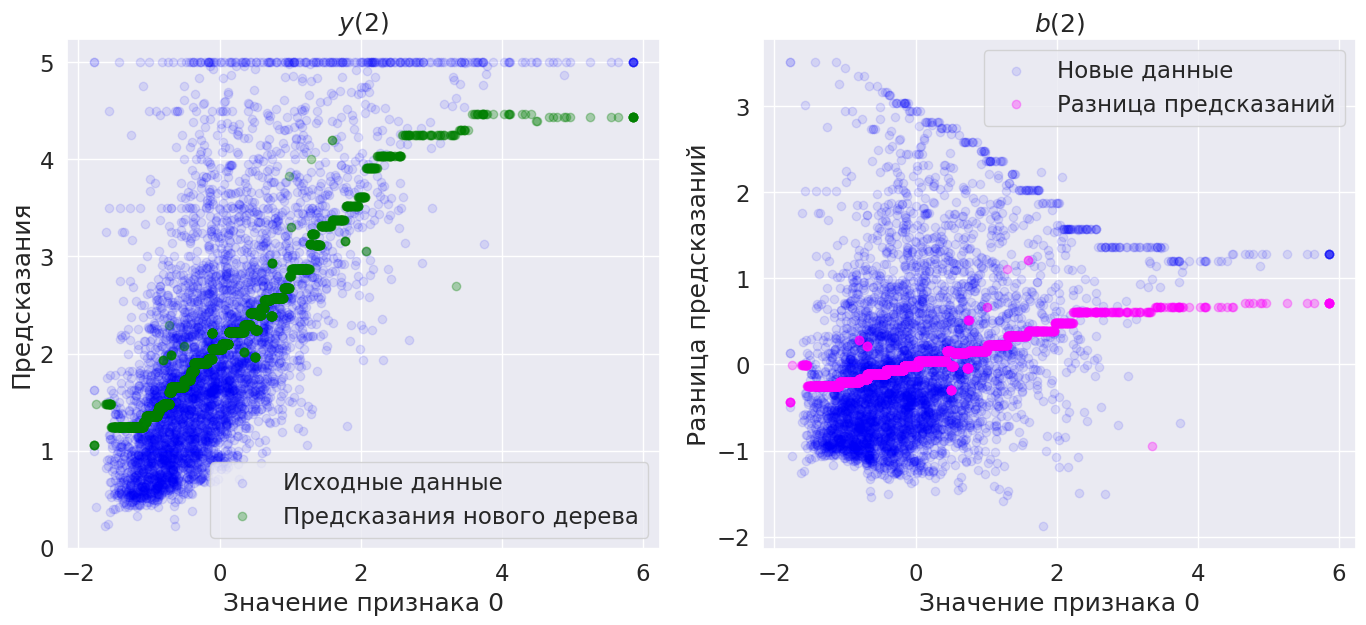

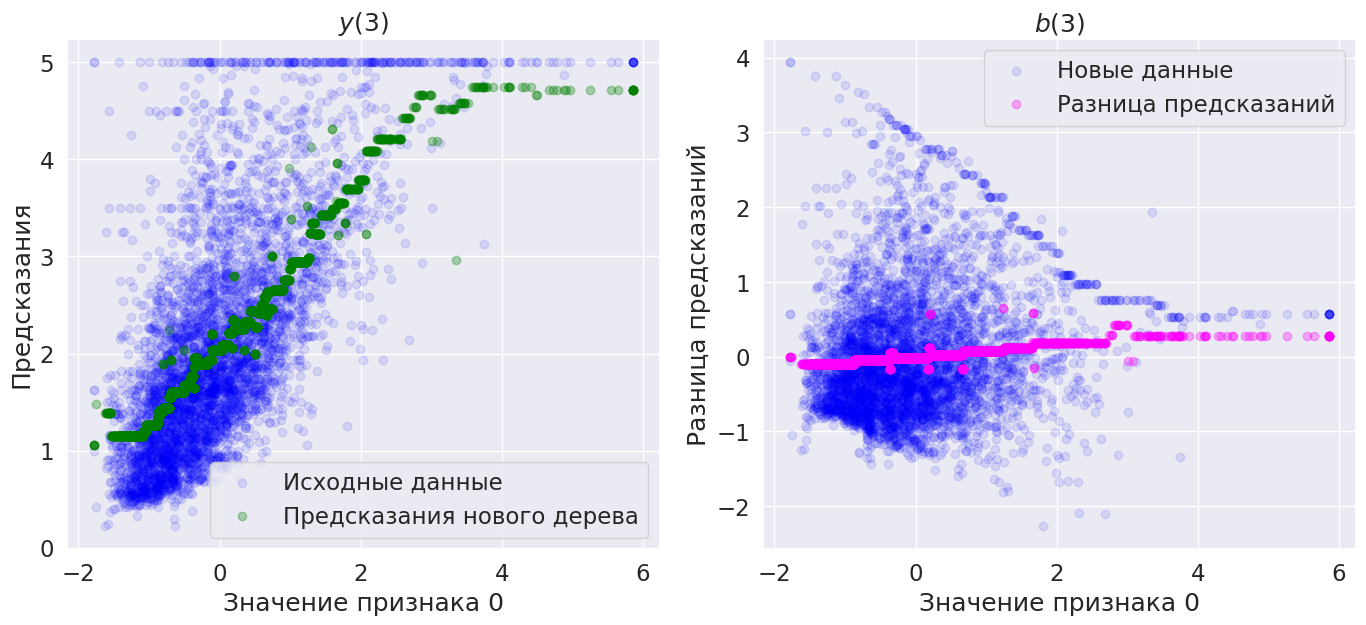

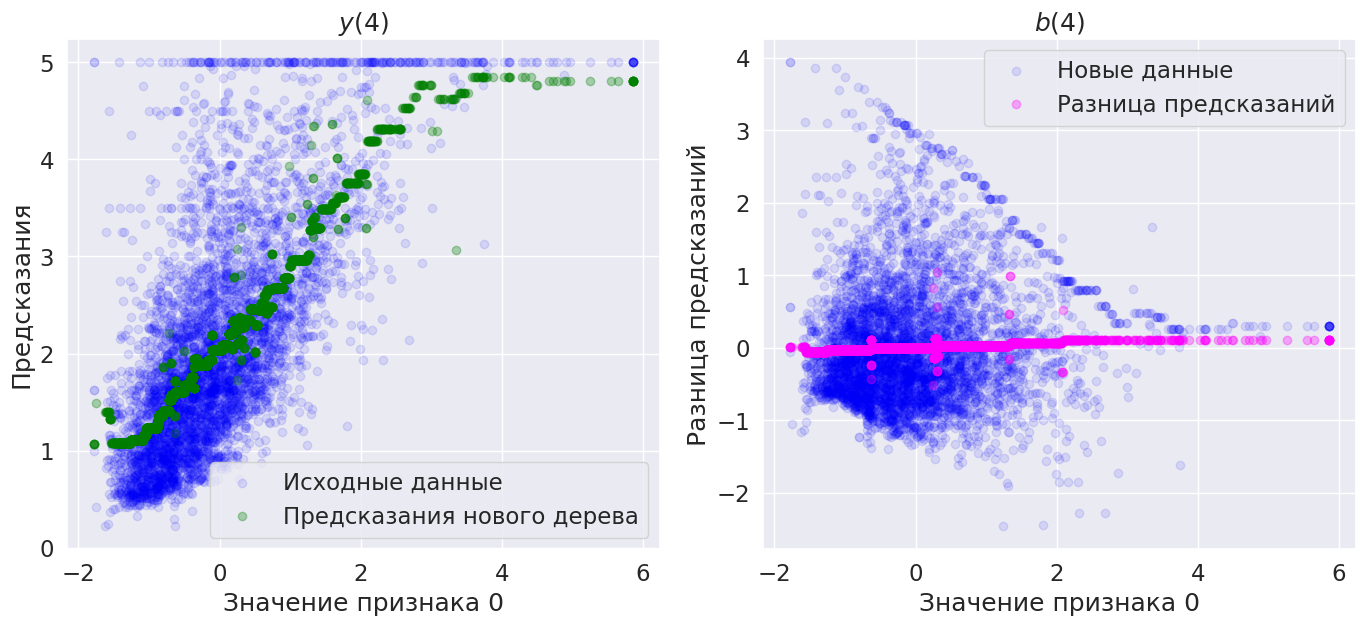

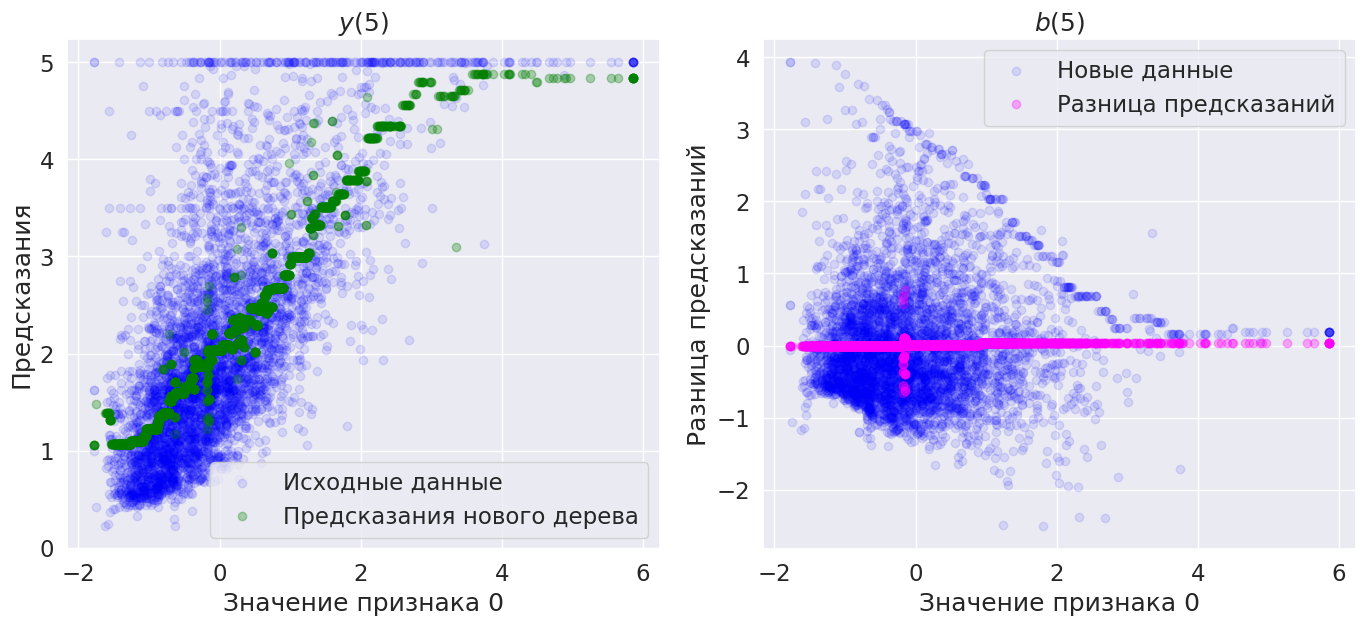

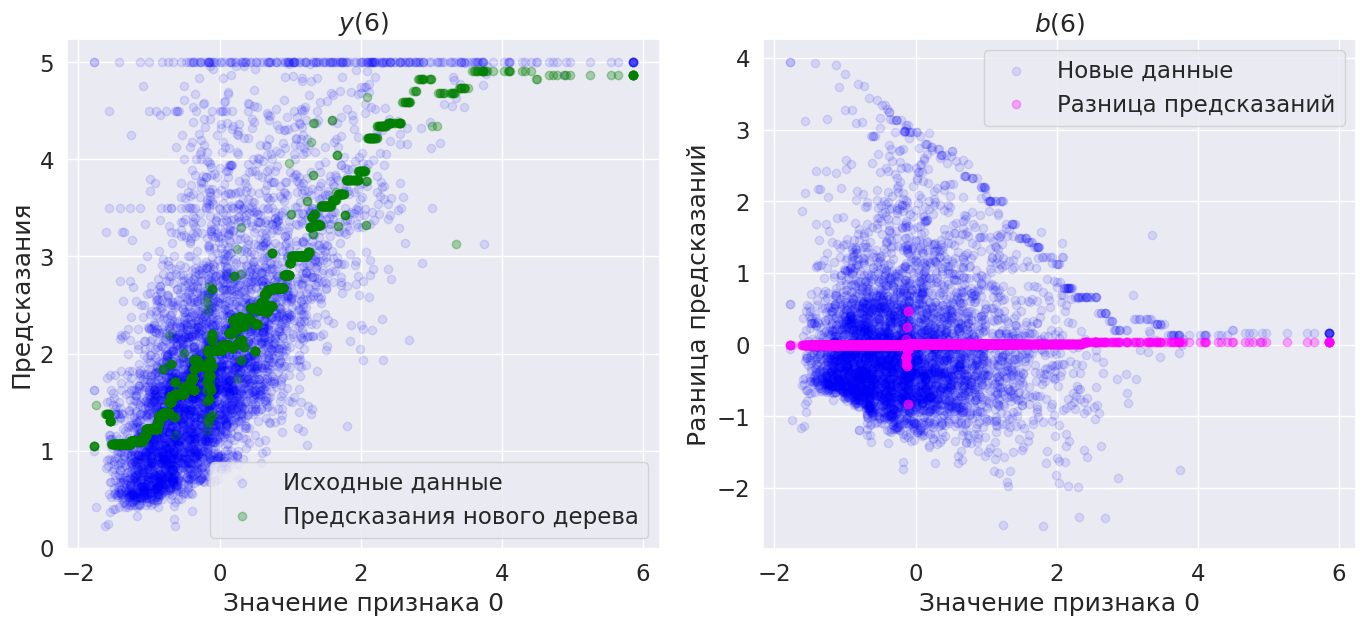

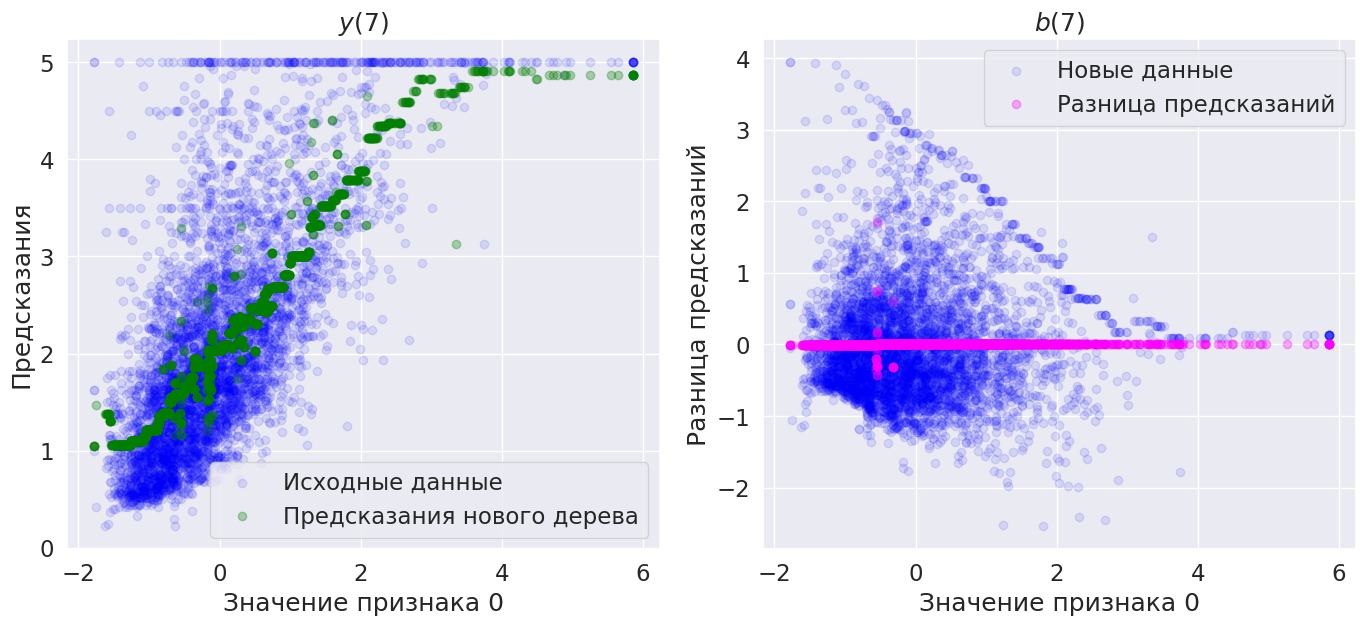

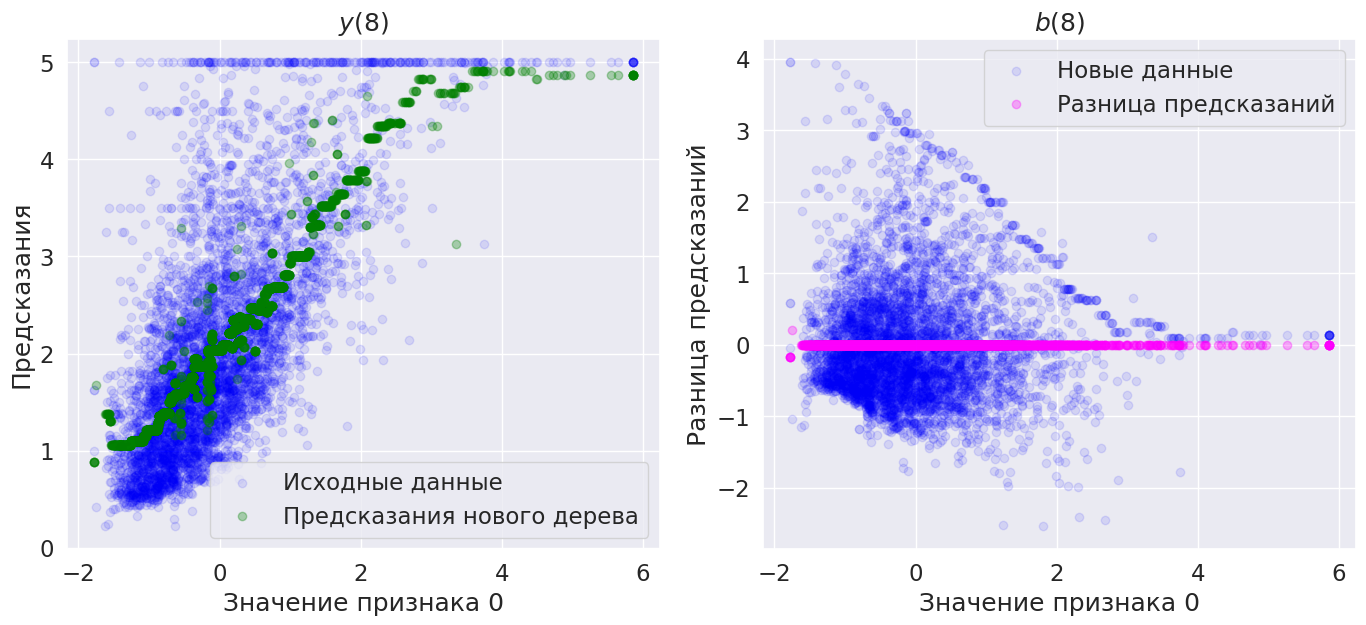

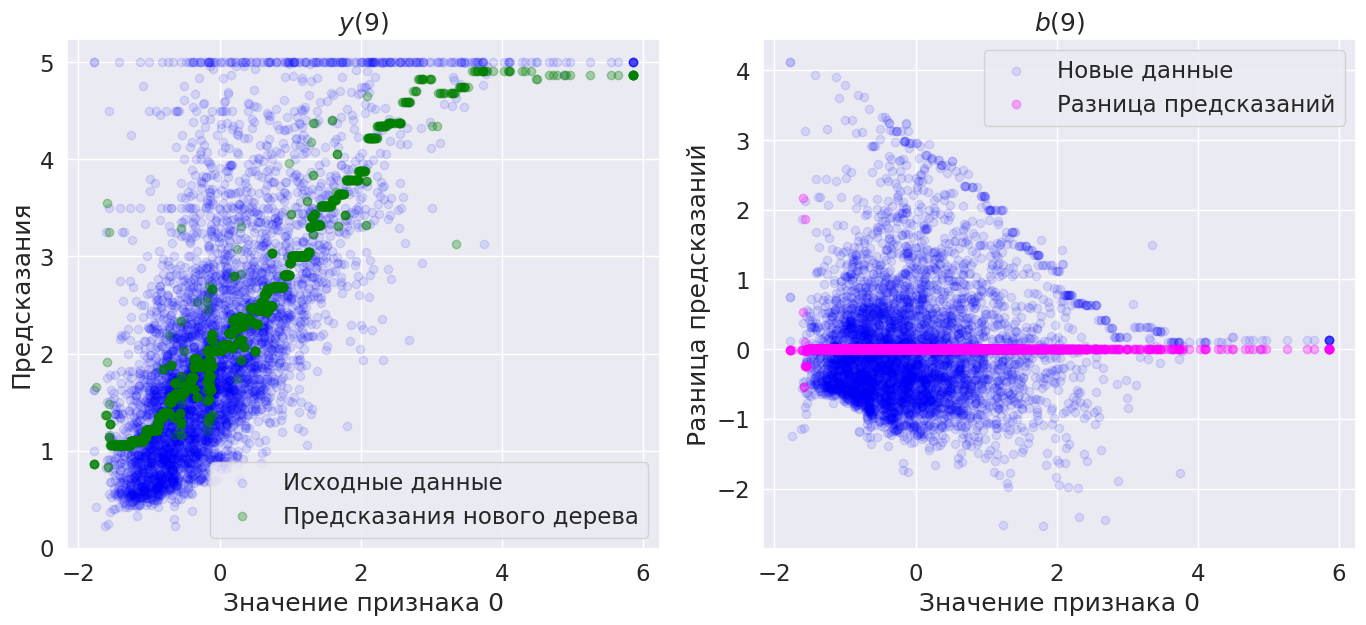

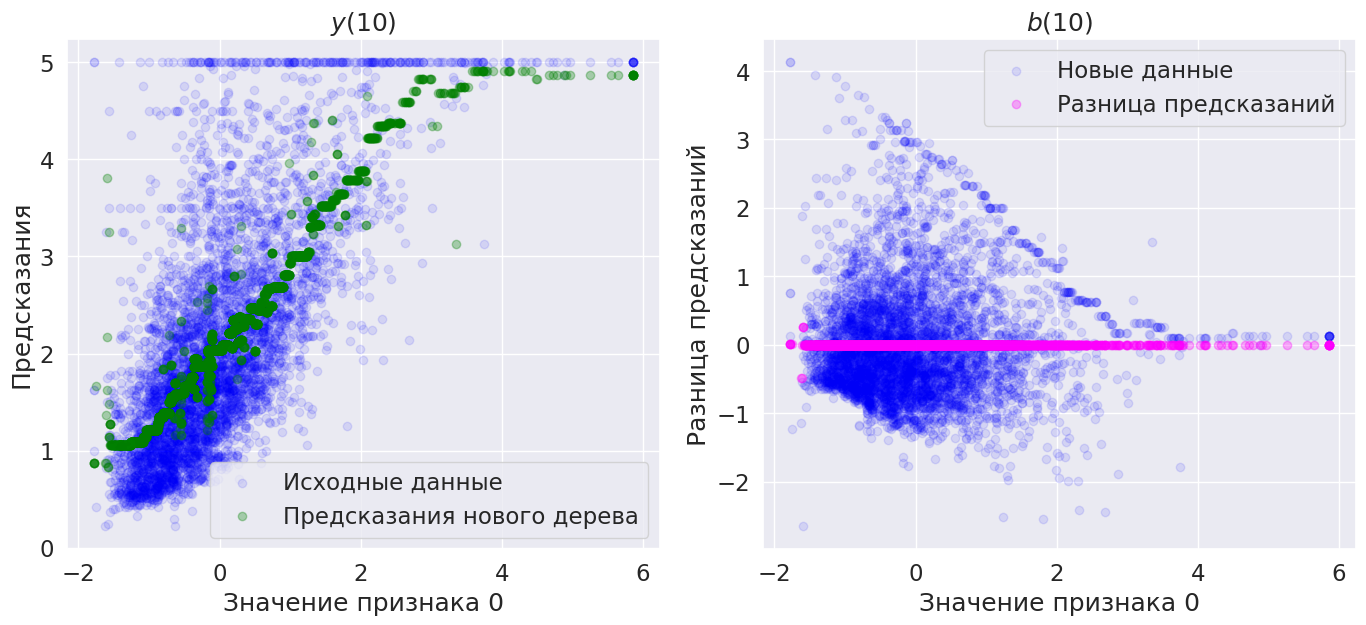

In [43]:
preds = list(gdb_one_feature_model.staged_predict(X_one_feature_test))
curr_pred = np.zeros(preds[0].shape)
old_pred = np.zeros(preds[0].shape)
new_pred = np.zeros(preds[0].shape)

plot_iteration_subplot(
    0,
    10,
    X_one_feature_test,
    y_test,
    curr_pred,
    old_pred,
    most_important_feature_idx,
)


for i, tree in enumerate(gdb_one_feature_model.estimators_):
    if i >= 10:
        break

    new_pred = tree[0].predict(X_one_feature_test).reshape(-1, 1)
    old_pred = curr_pred.copy()
    curr_pred = preds[i]

    plot_iteration_subplot(
        i + 1,
        12,
        X_one_feature_test,
        y_test,
        curr_pred,
        old_pred,
        most_important_feature_idx,
    )

Как получается выборка, на которой обучается новая базовая модель в данном случае и в общем случае? 

Выборка на которой обучается новая модель, есть разность тестовых данных и суммы предсказаний предыдущих моделей. В общем случае эта разность будет случайной, из за случайного подбора признака на каждом построении новой модели.

**Вывод**

Мы на практике пронаблюдали процесс обучения градиентного бустинга. Как видим, с увеличением итерации предсказание каждого нового дерева вносит все меньший вклад в финальный ответ модели. Между тем, на графике модели также видны выбросы, что также обсуждалось на лекции.

#### 4.

Параметр `init` у класса `GradientBoostingRegressor` задает модель, выполняющую начальные предсказания, с которых стартует построение ансамбля. Какая начальная модель используется по умолчанию?

По умолчанию используется DummyEstimator, прогнозирующий либо среднее целевое значение (для loss=’squared_error’), либо квантиль для других потерь.

Обучите градиентный бустинг на решающих деревьях, у которого в качестве инициализирующей модели используется линейная регрессия. Для этого в качестве параметра `init` передайте модель ридж-регрессии `Ridge`, которая должна быть инициализирована, но необучена. 

Подберите оптимальные гиперпараметры такой композиции. Как вы будете подбирать гиперпараметр ридж-регрессии? Улучшилось ли качество модели на тестовой выборке?

*Замечания.* 

1. Для настройки `alpha` в `Ridge`-модели внутри `GradientBoostingRegressor` вам может помочь метод `get_params()` у бустинга.
2. Не забывайте, что у бустинга тоже есть параметр `alpha`, не перепутайте их.

In [44]:
from sklearn.linear_model import Ridge

<b><font color="#00b565" size="5">Добавил стандартизацию</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b>  Нет стандартизации. Комм. Перед подачей данных в ridge-регрессию надо проводить стандартизацию




In [45]:
ridge_models = [Ridge(alpha=alpha) for alpha in np.logspace(-3, 2, 10)]
gdb_gridsearch_with_init = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions={
        "max_depth": np.arange(
            2, 6
        ).tolist(),  # Нет смысла брать большую глубину -- деревья могут переобучиться
        "n_estimators": [100, 200, 400],
        "learning_rate": np.logspace(-3, 0, 5),
        "init": ridge_models,
    },
    scoring="neg_mean_squared_error",  # оптимизируемый скор
    cv=3,  # разбиение выборки на 3 фолда
    verbose=1,  # насколько часто печатать сообщения
    n_jobs=-1,  # кол-во параллельных процессов
    n_iter=50,  # кол-во итераций случайного выбора гиперпараметров
    random_state=0,  # seed для фиксации генератора случайных чисел
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gdb_gridsearch_with_init.fit(X_train, y_train)
gdb_gridsearch_with_init.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 200,
 'max_depth': 3,
 'learning_rate': 0.1778279410038923,
 'init': Ridge(alpha=100.0)}

<b><font color="#00b565" size="5">Конец исправлений</font></b>


Сравним новую и старую модели

In [46]:
init_gdb_model = GradientBoostingRegressor(
    max_depth=gdb_gridsearch_with_init.best_params_["max_depth"],
    n_estimators=gdb_gridsearch_with_init.best_params_["n_estimators"],
    learning_rate=gdb_gridsearch_with_init.best_params_["learning_rate"],
    init=gdb_gridsearch_with_init.best_params_["init"],
)

gdb_model = GradientBoostingRegressor(
    max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate
)

init_gdb_model.fit(X_train, y_train)
gdb_model.fit(X_train, y_train)

y_init_pred = init_gdb_model.predict(X_test)
y_pred = gdb_model.predict(X_test)

mse_val_init = mse(y_test, y_init_pred)
mse_val = mse(y_test, y_pred)

print(f"Значение MSE для моделей с Ridge: {mse_val_init:.3f}")
print(f"Значение MSE для модели с DummyEstimator: {mse_val:.3f}")


if mse_val_init < mse_val:
    print("Как видим, модель с init = Ridge лучше чем с init=DummyEstimator")
else:
    print("Как видим, модель с init = Ridge хуже чем с init=DummyEstimator")


Значение MSE для моделей с Ridge: 0.257
Значение MSE для модели с DummyEstimator: 0.230
Как видим, модель с init = Ridge хуже чем с init=DummyEstimator


**Вывод**

Для каждого типа данных имеет смысл подбирать свой init, так можно добиться небольшого уменьшения loss. Впрочем, в нашем случае это напротив ухудшило результат.

#### 5. 

Рассмотрим модели смеси градиентного бустинга $\widehat{y}_{gb}$ и случайного леса $\widehat{y}_{rf}$ с оптимальными гиперпараметрами, подобранными ранее, в виде
$$\widehat{y}(x) = w \widehat{y}_{gb}(x) +  (1-w) \widehat{y}_{rf}(x),$$
где $w \in [0, 1]$ &mdash; коэффициент усреднения. Подберите оптимальное значение гиперпараметра $w$ и выведите его. Удалось ли добиться улучшения качества на тестовой выборке?

In [47]:
gdb_model = GradientBoostingRegressor(
    max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate
)

rf_model = RandomForestRegressor(n_estimators=226, max_depth=26)


gdb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

ws = np.linspace(0, 1, 50)
mse_train =[]

for w in ws:
    y_gdb_pred = gdb_model.predict(X_train)
    y_rf_pred = rf_model.predict(X_train)

    y_w = w * y_gdb_pred + (1 - w) * y_rf_pred
    mse_train.append(mse(y_train, y_w))

best_w= ws[np.argmin(mse_train)]
print(f"Лучшее w:{best_w:.3f}")

Лучшее w:0.224


In [48]:
mse_gdb = mse(y_test, gdb_model.predict(X_test))
mse_rf = mse(y_test, rf_model.predict(X_test))
mse_w = mse(
    y_test, best_w * gdb_model.predict(X_test) + (1 - best_w) * rf_model.predict(X_test)
)

print(f"MSE для градиентного бустинга: {mse_gdb:.3f}")
print(f"MSE для случайного леса: {mse_rf:.3f}")
print(f"MSE для комбинации: {mse_w:.3f}")


if np.abs(best_w) < 1e-5 or (mse_gdb < mse_w and mse_gdb < mse_rf):
    print("Градиентный бустинг работает лучше чем новая модель")
elif np.abs(best_w) > 1 - 1e-5 or (mse_rf < mse_w and mse_rf < mse_gdb):
    print("Случайный лес работает лучше чем новая модель")
else:
    print("Новая модель работает лучше")

MSE для градиентного бустинга: 0.231
MSE для случайного леса: 0.257
MSE для комбинации: 0.240
Градиентный бустинг работает лучше чем новая модель


**6.**

Сделайте итоговые выводы.

Как видим, градиентный бустинг в среднем работает лучше чем случайный лес. Он требует меньше времени для обучения, деревья в нем имеют меньшую глубину и меньшее количество листьев. Также, бустинг выдает предсказания на два порядка быстрее чем лес.

Тем не менее ни одна из предложенных модификаций градиентного бустинга не дала выигрыша в MSE, тем не менее когда я проводил эксперименты на усеченными данными выигрыши при использовании Ridge наблюдался, хоть и не большой. Поэтому init может позволить немного улучшить качество модели.

В заключении, мы убедились, что градиентный бустинг это самая мощная модель в нашем арсенале.
